<a href="https://colab.research.google.com/github/olupy/ml-models/blob/main/Mile_12_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import time

uploaded = files.upload()
# Load the Excel file
df = pd.read_excel('Mile-12_merged.xlsx')

# Remove irrelevant columns (first and last)
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df.dropna(inplace=True)
# Separate features (X) and target variables (y) for PM2.5 and PM10
X = df.iloc[:, :-2]
y_pm25 = df['pm25']
y_pm10 = df['pm10']

# Split the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train_pm25, y_test_pm25, y_train_pm10, y_test_pm10 = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

start_time = time.time()
# Train the model
history = model.fit(X_train_scaled, y_train_pm25, validation_split=0.2, epochs=100, callbacks=[early_stopping])
end_time = time.time()
processing_time = end_time - start_time
print("The procesing time for Mile-12 ANN: ", processing_time)
# Make predictions on the test set
y_pred_pm25 = model.predict(X_test_scaled)

# Calculate MSE and MAE
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)
rmse_pm25 = np.sqrt(mse_pm25)

print('MSE (PM2.5):', mse_pm25)
print('MAE (PM2.5):', mae_pm25)
print("rmse: ", rmse_pm25)
y_test_pm25= y_test_pm25.reset_index(drop=True)
sorted_indices = y_test_pm25.argsort()
y_test_pm25_sorted = y_test_pm25[sorted_indices]
y_pred_pm25_sorted = y_pred_pm25[sorted_indices]
# plot for PM2.5
plt.plot(y_test_pm25_sorted, y_pred_pm25_sorted, 'b-')  # 'b-' means a blue line
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5 For ANN')
plt.savefig("ANN-mile12.png", bbox_inches = "tight")
#files.download("ANN-mile12.png")
plt.show()


# Plot loss and validation loss over epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import time

uploaded = files.upload()
# Load the Excel file
df = pd.read_excel('Mile-12_merged.xlsx')

# Remove irrelevant columns (first and last)
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df.dropna(inplace=True)
# Separate features (X) and target variables (y) for PM2.5 and PM10
X = df.iloc[:, :-2]
y_pm25 = df['pm25']
y_pm10 = df['pm10']

# Split the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train_pm25, y_test_pm25, y_train_pm10, y_test_pm10 = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for RNN
X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Create the RNN model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

start_time = time.time()
# Train the model
history = model.fit(X_train_rnn, y_train_pm25, validation_split=0.2, epochs=100, callbacks=[early_stopping])
end_time = time.time()
processing_time = end_time - start_time
print("Processing time for Mile-12 RNN: ", processing_time)
# Make predictions on the test set
y_pred_pm25 = model.predict(X_test_rnn)

# Calculate MSE and MAE
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)
rmse_pm25 = np.sqrt(mse_pm25)

print('MSE (PM2.5):', mse_pm25)
print('MAE (PM2.5):', mae_pm25)
print("rmse: ", rmse_pm25)
# Scatter plot for PM2.5
y_test_pm25= y_test_pm25.reset_index(drop=True)
sorted_indices = y_test_pm25.argsort()
y_test_pm25_sorted = y_test_pm25[sorted_indices]
y_pred_pm25_sorted = y_pred_pm25[sorted_indices]
# plot for PM2.5
plt.plot(y_test_pm25_sorted, y_pred_pm25_sorted, 'b-')  # 'b-' means a blue line
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5 For RNN')
plt.savefig("RNN-mile12.png", bbox_inches = "tight")
files.download("RNN-mile12.png")
plt.show()



# Plot loss and validation loss over epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Validation Loss')
plt.legend()
plt.show()

KeyboardInterrupt: ignored

Saving Mile-12_merged.xlsx to Mile-12_merged (3).xlsx
Processing time for Mile-12 Random Forest:  0.6796755790710449
MSE (PM2.5): 0.14799658267431745
MAE (PM2.5): 0.1309674445895552


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

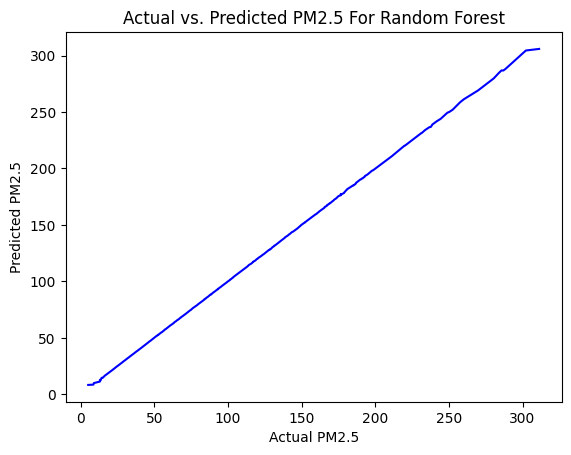

MSE (PM10): 108958.2978868637
MAE (PM10): 227.23530273248645


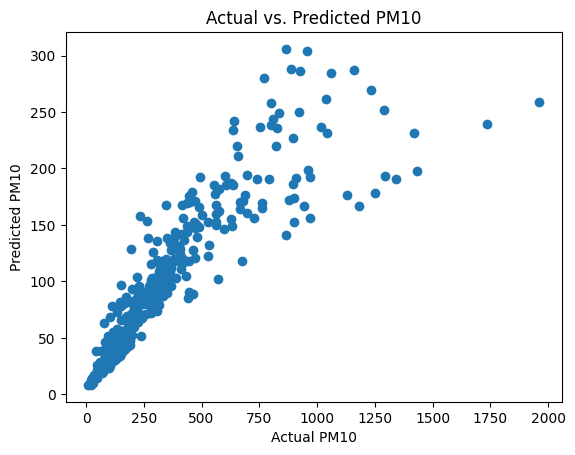

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import time

uploaded = files.upload()

# Load the Excel file
df = pd.read_excel('Mile-12_merged.xlsx')

# Remove irrelevant columns (first and last)
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features (X) and target variables (y) for PM2.5 and PM10
X = df.iloc[:, :-2]
y_pm25 = df['pm25']
y_pm10 = df['pm10']

# Split the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train_pm25, y_test_pm25, y_train_pm10, y_test_pm10 = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

start_time = time.time()
# Train the model
model.fit(X_train_scaled, y_train_pm25)
end_time = time.time()
processing_time = end_time - start_time
print("Processing time for Mile-12 Random Forest: ", processing_time)
# Make predictions on the test set
y_pred_pm25 = model.predict(X_test_scaled)

# Calculate MSE and MAE
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)
rmse_pm25 = np.sqrt(mse_pm25)

print('MSE (PM2.5):', mse_pm25)
print('MAE (PM2.5):', mae_pm25)
print("rmse: ", rmse_pm25)
# Scatter plot for PM2.5
y_test_pm25= y_test_pm25.reset_index(drop=True)
sorted_indices = y_test_pm25.argsort()
y_test_pm25_sorted = y_test_pm25[sorted_indices]
y_pred_pm25_sorted = y_pred_pm25[sorted_indices]
# plot for PM2.5
plt.plot(y_test_pm25_sorted, y_pred_pm25_sorted, 'b-')  # 'b-' means a blue line
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5 For Random Forest')
plt.savefig("RDF-mile12.png", bbox_inches = "tight")
files.download("RDF-mile12.png")
plt.show()

# Make predictions on the test set for PM10
y_pred_pm10 = model.predict(X_test_scaled)
mse_pm10 = mean_squared_error(y_test_pm10, y_pred_pm10)
mae_pm10 = mean_absolute_error(y_test_pm10, y_pred_pm10)

print('MSE (PM10):', mse_pm10)
print('MAE (PM10):', mae_pm10)

# Scatter plot for PM10
plt.scatter(y_test_pm10, y_pred_pm10)
plt.xlabel('Actual PM10')
plt.ylabel('Predicted PM10')
plt.title('Actual vs. Predicted PM10')
plt.show()

Saving Mile-12_merged.xlsx to Mile-12_merged (4).xlsx
Processing time for Mile-12 Gradient boost:  0.48328542709350586
MSE (PM2.5): 0.4232390789662022
MAE (PM2.5): 0.4047507912849566


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

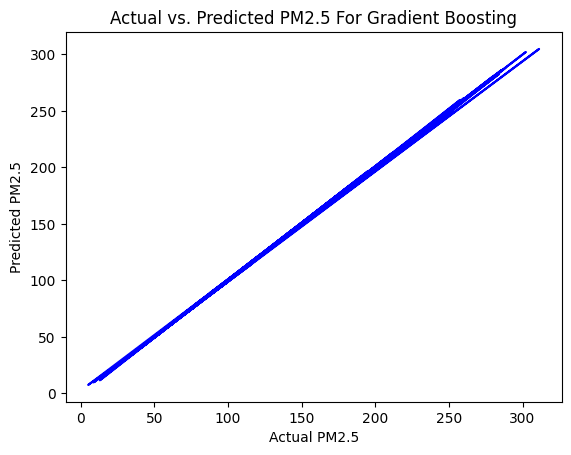

MSE (PM10): 109030.25425942973
MAE (PM10): 227.27201476836575


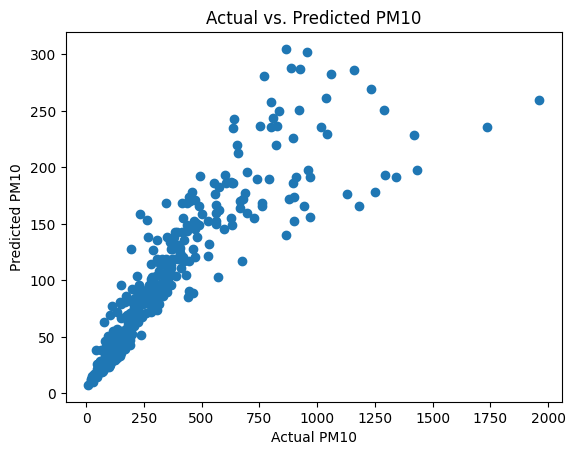

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import time

uploaded = files.upload()

# Load the Excel file
df = pd.read_excel('Mile-12_merged.xlsx')

# Remove irrelevant columns (first and last)
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features (X) and target variables (y) for PM2.5 and PM10
X = df.iloc[:, :-2]
y_pm25 = df['pm25']
y_pm10 = df['pm10']

# Split the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train_pm25, y_test_pm25, y_train_pm10, y_test_pm10 = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

start_time = time.time()
# Train the model
model.fit(X_train_scaled, y_train_pm25)
end_time = time.time()
processing_time = end_time - start_time
print("Processing time for Mile-12 Gradient boost: ", processing_time)
# Make predictions on the test set
y_pred_pm25 = model.predict(X_test_scaled)

# Calculate MSE and MAE
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)
rmse_pm25 = np.sqrt(mse_pm25)

print('MSE (PM2.5):', mse_pm25)
print('MAE (PM2.5):', mae_pm25)
print("rmse: ", rmse_pm25)
# Scatter plot for PM2.5
plt.plot(y_test_pm25, y_pred_pm25, 'b-')  # 'b-' means a blue line
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5 For Gradient Boosting')
plt.savefig("GDB-mile12.png", bbox_inches = "tight")
files.download("GDB-mile12.png")
plt.show()



Saving Mile-12_merged.xlsx to Mile-12_merged (5).xlsx
Processing time for Mile-12 Decision tree:  0.008759260177612305
MSE (PM2.5): 0.31893083330140354
MAE (PM2.5): 0.21221726261502258


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

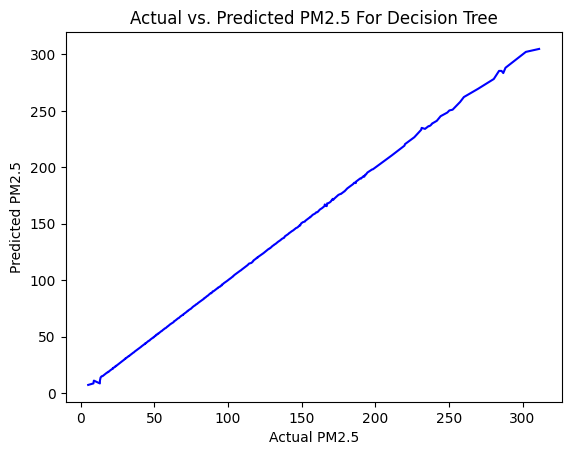

MSE (PM10): 108964.25990144786
MAE (PM10): 227.2457504710399


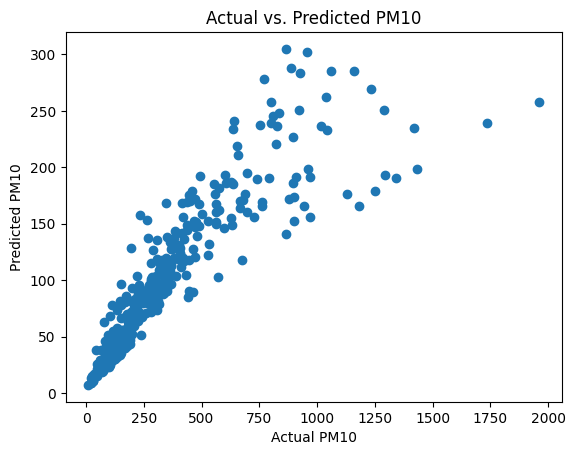

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import time

uploaded = files.upload()

# Load the Excel file
df = pd.read_excel('Mile-12_merged.xlsx')

# Remove irrelevant columns (first and last)
df = df.iloc[:, 1:-1]

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features (X) and target variables (y) for PM2.5 and PM10
X = df.iloc[:, :-2]
y_pm25 = df['pm25']
y_pm10 = df['pm10']

# Split the data into train and test sets (80% for training, 20% for testing)
X_train, X_test, y_train_pm25, y_test_pm25, y_train_pm10, y_test_pm10 = train_test_split(
    X, y_pm25, y_pm10, test_size=0.2, random_state=42)

# Scale the feature data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)

start_time = time.time()
# Train the model
model.fit(X_train_scaled, y_train_pm25)
end_time = time.time()
processing_time = end_time - start_time
print("Processing time for Mile-12 Decision tree: ", processing_time)
# Make predictions on the test set
y_pred_pm25 = model.predict(X_test_scaled)

# Calculate MSE and MAE
mse_pm25 = mean_squared_error(y_test_pm25, y_pred_pm25)
mae_pm25 = mean_absolute_error(y_test_pm25, y_pred_pm25)
rmse_pm25 = np.sqrt(mse_pm25)

print('MSE (PM2.5):', mse_pm25)
print('MAE (PM2.5):', mae_pm25)
print("rmse: ", rmse_pm25)
# Scatter plot for PM2.5
y_test_pm25= y_test_pm25.reset_index(drop=True)
sorted_indices = y_test_pm25.argsort()
y_test_pm25_sorted = y_test_pm25[sorted_indices]
y_pred_pm25_sorted = y_pred_pm25[sorted_indices]
# plot for PM2.5
plt.plot(y_test_pm25_sorted, y_pred_pm25_sorted, 'b-')  # 'b-' means a blue line
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs. Predicted PM2.5 For Decision Tree')
plt.savefig("DST-mile12.png", bbox_inches = "tight")
files.download("DST-mile12.png")
plt.show()

